# さまざまな計算方法

微分でも積分でも起こりうることがあります。それはそのままだと「計算しづらい」もしくは「計算できない」といった問題です。

これについてはさまざまな方法で回避するテクニックがあります。その中でも変数変換および媒介変数を使った計算です。

機械学習でもよく使われるため、簡単に抑えておきます。ただし、それほどプログラマブルな要素ではないため、軽く目を通してみてください。
いやになったら後で見返してください。


## 微分

### 関数の積の微分

$f(x) = x^2 + 1, g(x) = x^2 + 3x + 1$　のような関数があったときに、2つの関数の積 $f(x)g(x) = (x^2 + 1)(x^2 + 3x + 1)$のように新たな関数を作れます。
このような関数の積の微分は

$$
\begin{aligned}
f(x)g(x) &= (x^2 + 1)(x^2 + 3x + 1)\\
         &= x^2(x^2 + 3x +1) + (x^2 + 3x + 1)\\
         &= x^4 + 3x^3 + x^2  + x^2 + 3x + 1\\
         &= x^4 + 3x^3 + 2x^2 + 3x + 1
\end{aligned}
$$
のように展開してから微分もできますが、関数によってはこのように分解できない場合が多いです。このときに次のように微分ができます。

#### 定理: 関数の積の微分

$$(f(x)g(x))' = f'(x)g(x) + f(x)g'(x)$$

$f(x)g(x)$の$f(x)$を微分したものと$g(x)$ を微分したものをかけ、次に$f(x)$ と $g(x)$を微分したものをかけ、それぞれを足すと計算できます。上の例であれば、

$$
\begin{aligned}
(f(x)g(x))' &= ((x^2 + 1)(x^2 + 3x + 1))'\\
            &= (x^2+1)'(x^2 + 3x + 1) + (x^2 + 1)(x^2 + 3x + 1)'\\
            &= 2x(x^2 + 3x + 1) + (x^2 + 1)(2x + 3)\\
            &= 2x^3 + 6x^2 + 2x + 2x^3 + 3x^2 + 2x + 3\\
            &= 4x^3 + 9x^2 + 4x + 3
\end{aligned}
$$

となります。上で展開したものを微分すれば同じになることが確認できます。

Juliaでも確認してみましょう。






In [10]:
# SymPyをインストール
using Pkg
Pkg.add("SymPy")
Pkg.build("PyCall")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/1fc929f47d7c151c839c5fc1375929766fb8edcc/build.log`


In [16]:
using SymPy

# 微分する変数を指定
x=symbols("x")

h = (x^2 + 1)*(x^2 +3x + 1)

# 微分して（）を展開
sympy.expand(h.diff(x))


   3      2          
4⋅x  + 9⋅x  + 4⋅x + 3

### 関数の商の微分

関数$f(x),g(x)$に対して、$g(x) \neq 0$ のときに

$$\frac{f(x)}{g(x)}$$

を考えられます。この関数の微分は以下のように計算できます。

#### 定理: 関数の商の微分

$$ \Bigg(\frac{f(x)}{g(x)} \Bigg)' = \frac{f(x)'g(x) - f(x)g(x)'}{ g^2(x)} $$

関数の積の微分よりだいぶ複雑ですね。分母は$g(x)$を2乗しています。分子は関数の積の微分の2つ目の項が$-$になっています。

計算してみましょう。　$f(x) = x^2 +1, g(x) = x^2 - 2x + 3$とします。確認のために$g(x)$をグラフにしてみましょう。

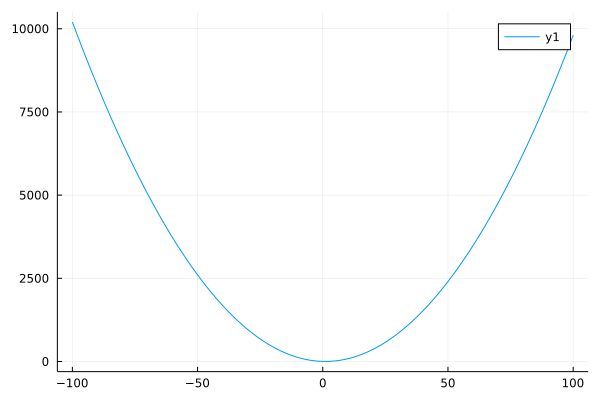

In [20]:
using Plots

g = x -> x^2 - 2x + 3
plot(g, -100:100)

$-100 \leq x \leq 100$の区間しか表示できていませんが、最小値が0をうわまわっていることがわかります。つまり$g(x)$はすべての$x$について$g(x) \neq 0$ です。
商を考えるときは分母が0とならないか、注意が必要です。もし0になる場合が会ったとしても、0になる点を除いた区間を対象にすれば商を考えられます。

さて、微分してみましょう。


$$
\begin{aligned}
\Bigg(\frac{f(x)}{g(x)}\Bigg)' &= \Bigg(\frac{x^2 + 1}{ x^2 - 2x + 3}\Bigg)'\\
                  &= \frac{(x^2 + 1)'(x^2 - 2x + 3) - (x^2 + 1)(x^2 - 2x + 3)' }{ (x^2 - 2x + 3)^2 }\\
                  &= \frac{(2x(x^2 - 2x + 3) - (x^2 + 1)(2x -2) }{ (x^2 - 2x + 3)^2 }\\                  
                  &= \frac{((2x^3 - 4x^2 + 6x) - (2x^3 - 2x^2 + 2x -2) }{ (x^2 - 2x + 3)^2 }\\                  
                  &= \frac{-2x^2 + 4x  + 2}{ (x^2 - 2x + 3)^2 }
\end{aligned}
$$


Julia でも確認してみましょう。

In [31]:
using SymPy

x = symbols("x")
h = (x^2 + 1)/(x^2 - 2x + 3)

h.diff(x)

                         ⎛ 2    ⎞
    2⋅x        (2 - 2⋅x)⋅⎝x  + 1⎠
──────────── + ──────────────────
 2                            2  
x  - 2⋅x + 3    ⎛ 2          ⎞   
                ⎝x  - 2⋅x + 3⎠   

Juliaだと更に分数を整理した形で出力されてしまっていますが、計算式と同じ結果になっています。

### 合成関数の微分

$z = g(y), y = g(x)$となっているような関数があります。関数$g$の変数#$y$で、$y$は$f(x)$の値となっています。このとき、$g(y)$に$y = f(x)$を代入して、$z = g(f(x))$と表現できます。この$g(f(x))$ を　**合成関数** といい、$g \circ f(x) = g(f(x))$ といいます。

Juliaで表現すると次のとおりです。

In [34]:
function g2(y)
    y^4
end
function f2(x)
    3x^2 - 4x +1
end

z = g2(f2(x))
    

                4
⎛   2          ⎞ 
⎝3⋅x  - 4⋅x + 1⎠ 

合成関数の微分は次のように計算します。

#### 合成関数の微分法

$$\bigg(g(f(x))\bigg)' = g'(f(x)) \times f'(x)$$

説明としては、外側($g$)を微分し、内側（$f$）を微分したものをかけます。

計算してみます。Juliaの例の通り、$g(y) = y^4, f(x) = 3x^2 - 4x + 1$で計算してみます。

$$
\begin{aligned}
(g(f(x)))'  &= ((3x^2 - 4x + 1)^4)'\\
            &= 4 \times (3x^2 -4x +1)^(4-1) \times (3x^2 - 4x + 1)'\\
            &= 4 \times (3x^2 -4x +1)^3 \times (6x - 4)\\ 
            &= 4(3x^2 - 4x + 1)^3(6x - 4)
\end{aligned}
$$

Juliaでも確認してみましょう。

In [35]:
x = symbols("x")
h2 = (3x^2 - 4x + 1)^4

h2.diff(x)

                            3
            ⎛   2          ⎞ 
(24⋅x - 16)⋅⎝3⋅x  - 4⋅x + 1⎠ 

計算結果の最初の4を最後の()の中にかけた結果がでました。ですので計算は間違っていません。

### 　三角関数の微分

少々、難度高めです。微分には、これまでに紹介していない関数の微分が存在します。これらをすべて紹介すると専門書と変わらない内容になってしまうため、一例として三角関数の微分を紹介します。
その前に三角関数とはなにか、を少しだけ紹介します。三角関数は機械学習やフーリエ変換などでも出てくるため、知っておくとかなり有益です。

その前に**弧度法**を紹介します。小中学校では直角を$90^{\circ}$ といった表現で角度を表しますが、角度というのは計算する上で非常に不便です。
そのため「孤（円周の一部）の長さと角度を対比させて考える」のが弧度法です。

半径が1の円を考えます。すると円周の公式$2\pi r(rを円の半径とする)$より、円周の長さは$2\pi$です。これを基準に角度を表します。

円が一周したら角度は $360^(\circ)$です。このときの円周の長さは、$2 \pi$ でした。
半円のときの角度は $18^{\circ}$です。このときの孤の長さは、円周の半分なので$\pi$です。
四分円のときの角度は $90^{\circ}$です。このときの孤の長さは、半円の更に半分なので $\frac{\pi}{2}$です。
2周したら$4\pi$であり、0度は$0$です。

といったように表現することで、すべての角度を「長さ」で表現できます。

<img src="./images/07/01.png" alt="Drawing" style="width: 500px;"/>

弧度法により、三角関数を「きれいに」扱うことができるようになりました。


次に三角関数ですが、天下りで応用から説明します。

$xy$平面にある点を置きます。すると「座標」を考えられます。

<img src="./images/07/02.png" alt="Drawing" style="width: 500px;"/>

座標とは、「原点から各軸ごとの距離」としてみることができます。そのため$(x, y)$という形で表現できるわけです。
これを次の図のようにみることはできないでしょうか？


<img src="./images/07/03.png" alt="Drawing" style="width: 500px;"/>

原点と点を両端とする線分を引きます。この直線の長さを$r$、$x$軸と線分の間に挟まれた角度を$\theta$とします。
この2つの変数$(r, \theta)$で点を表現することができそうです。

すると、この$(x, y)$と$(r, \theta)$はどういった関係になるでしょうか。
これをうまく表現してくれるのが三角関数です。
実は$x, y$は美味い具合に$r,\theta$で次のように表現できます。

$$
\begin{aligned}
x &= r \cos \theta\\
y &= r \sin \theta\\
\end{aligned}
$$

なぜこのようにできるのか、というが何かということを見ることでわかります。

まず下の図をご覧ください。


<img src="./images/07/04.png" alt="Drawing" style="width: 500px;"/>

点$O$を中心とする円周上に点$A$をとります。点$O$と点$A$を両端とする線分を引きます。
次に（皆さんが苦手とする）補助線を2本引きます。1本目は点$A$から$x$軸に垂直に線を引きます。この線と$x$軸と交差した点を$B$とします。
次に、直線$OA$と垂直に交わる直線を引くと$x$軸と交差します。この交差した点を点$C$とします。
これで準備は完了です。

OAというのは円の半径ですので、ここでは半径を$r$としておきます。
更に、OAと$x$軸の間の角度を（弧度法で）$\theta$とします。このとき、sinとcosを次のように定義します。

$$
\begin{aligned}
\sin \theta &= \frac{\Delta OABの縦の長さ}{\Delta OABの斜辺の長さ}\\
            \\
            &= \frac{ABの長さ}{OAの長さ}\\
            \\
            &=  \frac{ABの長さ}{r}\\
\end{aligned}
$$

$$
\begin{aligned}
\cos \theta &= \frac{\Delta OABの横の長さ}{\Delta OABの斜辺の長さ}\\
                \\
            &= \frac{OBの長さ}{OAの長さ}\\
                \\
            &=  \frac{OBの長さ}{r}
\end{aligned}
$$


これがsinとcosの定義です。では、なぜこれが先ほどの座標の話に行き着くのでしょうか。
上の定義を少し変形してみましょう。

$$
\begin{aligned}
\sin \theta &= \frac{ABの長さ}{r}\\
                \\
ABの長さ　     &= r \times \sin \theta
\end{aligned}
$$

$$
\begin{aligned}
\cos \theta &= \frac{OBの長さ}{r}\\
                \\
OBの長さ　     &= r \times \cos \theta
$$

線分ABの長さと線分OBの長さを表す式となりました。右辺はどこかで見覚えがありますね。
先ほどの

$$
\begin{aligned}
x &= r \cos \theta\\
y &= r \sin \theta\\
\end{aligned}
$$

でした。
実はABの長さは$\Delta OAB$の縦の長さでした。更に点$O$は原点でしたので、ABの長さは「原点からの$y$軸上の距離」と見なせます。
OBも同様に「原点からの$x$軸上の距離」と見なすことができます。
先ほどのグラフで表すと、次のようになります。

<img src="./images/07/05.png" alt="Drawing" style="width: 500px;"/>

$xy$平面上の点は円の大きさを変えれば「三角形の斜辺の長さ」　はいくらでも変えられます。
$\theta$については、最大でも円を一周するときの角度と考えられるため、$0 \lte \theta　\lte \pi$の範囲で動きます。
つまり、座標上のあらゆる点は$r, \theta$の二つの変数で表現できる、ということになります。

「$(x, y)$ではなく$(r, \theta)$がなぜ必要なのか？」と思うかもしれません。（「なぜ必要なのか」というのはナンセンスな質問ですが、人は思いがちです。）
必要性についてはたくさんありますが、ここでは「そう表現することでできるようになる微分や積分の計算があるから」としておきます。

具体的な例は、次の「媒介変数表示の微分法」で紹介します。
